In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Bank_Churn.csv')

In [3]:
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Checking null values

In [5]:
dataset.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### Handling Categorical Values

In [6]:
dataset.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [11]:
dataset.drop('customer_id', axis=1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### I dropped customer ID because it is not useful in predicting whether the customer was retained

In [13]:
X=dataset[['credit_score', 'country', 'gender',
           'age', 'tenure', 'balance', 'products_number',
           'credit_card', 'active_member', 'estimated_salary']]
Y=dataset[['churn']]

In [14]:
X=pd.get_dummies(dataset[['credit_score', 'country', 'gender',
           'age', 'tenure', 'balance', 'products_number',
           'credit_card', 'active_member', 'estimated_salary']])
X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


## Test 1

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.4,
                                               random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

### Confusion Matrix

In [17]:
Y_pred=classifier.predict(X_test.values)

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM= confusion_matrix(Y_test,Y_pred)

In [19]:
print(CM)

[[3115   75]
 [ 743   67]]


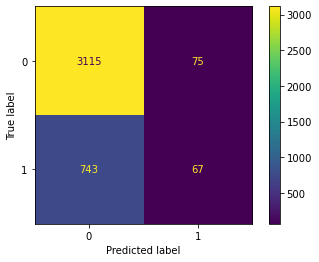

In [20]:
disp=ConfusionMatrixDisplay(confusion_matrix=CM,
                            display_labels=classifier.classes_)
disp.plot()

### Results
- True Negative: 3115
- False Negative: 743
- False Positive: 75
- True Positive: 67

### Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      3190
           1       0.47      0.08      0.14       810

    accuracy                           0.80      4000
   macro avg       0.64      0.53      0.51      4000
weighted avg       0.74      0.80      0.73      4000



#### This split makes pretty accurate predictions at about 80%

## Test 2

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,
                                               random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

In [24]:
Y_pred=classifier.predict(X_test.values)

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
CM=confusion_matrix(Y_test,Y_pred)

In [26]:
print(CM)

[[2354   62]
 [ 536   48]]


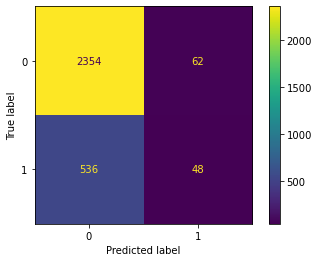

In [27]:
disp=ConfusionMatrixDisplay(confusion_matrix=CM,
                            display_labels=classifier.classes_)
disp.plot()

### Results
- True Negative: 2354
- False Negative: 536
- False Positive: 62
- True Positive: 48

### Classification Report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



#### This test also has 80% accuracy 

## Test 3

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,
                                               random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

In [31]:
Y_pred=classifier.predict(X_test.values)

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
CM=confusion_matrix(Y_test,Y_pred)

In [33]:
print(CM)

[[1573   34]
 [ 365   28]]


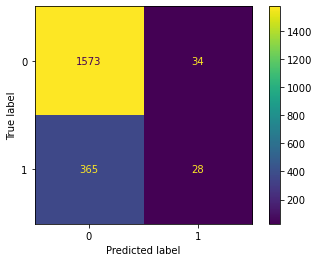

In [34]:
disp=ConfusionMatrixDisplay(confusion_matrix=CM,
                            display_labels=classifier.classes_)
disp.plot()

### Results
- True Negative: 1573
- False Negative: 365
- False Positive: 34
- True Positive: 28

### Classification Report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



#### This split also has 80% accuracy